# Example of usage ImageAdaptiveThresholding and  ImageAdaptiveBinarizer transformers

## Install spark-ocr python packge
Need specify path to `spark-ocr-assembly-[version].jar` or `secret`

In [1]:
secret = ""
license = ""
version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.11/"

In [2]:
# install from PYPI using secret
# %pip install spark-ocr==$version --extra-index-url=https://pypi.johnsnowlabs.com/$secret --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.johnsnowlabs.com/4.0.0-49cdb09f66ca01a93f959366f0e4a84d1a09b2df


In [3]:
#or install from local path
#%pip install ../../python/dist/spark-ocr-3.9.0+spark30.tar.gz

## Initialization of spark session

In [4]:
from sparkocr import info
info()

Spark version: 3.2.1
Spark NLP version: 4.0.0
Spark OCR version: 4.0.0



In [5]:
from pyspark.sql import SparkSession
from sparkocr import start
import sys
import os

if license:
    os.environ['JSL_OCR_LICENSE'] = license

spark = start(secret=secret, jar_path=spark_ocr_jar_path)
spark

Spark version: 3.2.1
Spark NLP version: 4.0.0
Spark OCR version: 4.0.0



## Import OCR transformers

In [6]:
from pyspark.ml import PipelineModel

from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import display_image

## Define OCR transformers and pipeline

In [7]:
binary_to_image = BinaryToImage() \
    .setInputCol("content") \
    .setOutputCol("image")

ocr = ImageToText() \
    .setInputCol("corrected_image") \
    .setOutputCol("text") \
    .setConfidenceThreshold(70) \
    .setIgnoreResolution(False) \
    .setPageIteratorLevel(PageIteratorLevel.SYMBOL)

## Read PDF document as binary file

In [8]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-ocr-workshop/master/jupyter/data/images/text_with_noise.png

In [9]:
image_example = "text_with_noise.png"
image_example_df = spark.read.format("binaryFile").load(image_example).cache()

## Gaussian local thresholding


    Image #0:
    Origin: file:/content/text_with_noise.png
    Resolution: 95 dpi
    Width: 1095 px
    Height: 134 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


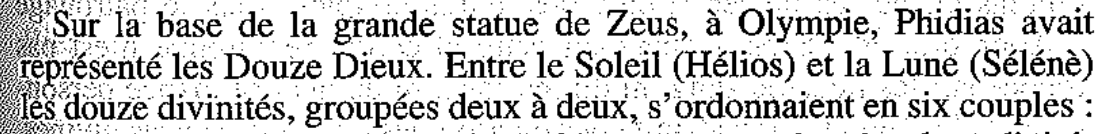


    Image #0:
    Origin: file:/content/text_with_noise.png
    Resolution: 95 dpi
    Width: 1095 px
    Height: 134 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 1


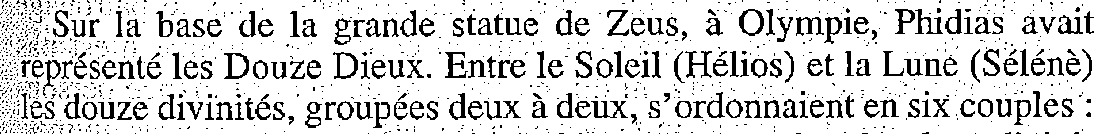

Detected text:

Su la base” de la grande statue de Zeus, a “Olympie, Phidias avait
nté les Douze Dieux. ‘Entre le’ Soleil (Hélios) et Ja Lune (Séléné)
Ze divinités, groupées deux a deux, Js "ordonnaient en six couples’:
  
 


In [10]:
adaptive_thresholding = ImageAdaptiveThresholding() \
    .setInputCol("image") \
    .setOutputCol("corrected_image") \
    .setBlockSize(35) \
    .setOffset(90) \
    .setKeepInput(True)

pipeline = PipelineModel(stages=[
    binary_to_image,
    adaptive_thresholding,
    ocr
])

for r in pipeline.transform(image_example_df).select("image", "corrected_image", "text").collect():
    display_image(r.image)
    display_image(r.corrected_image)
    print(f"Detected text:\n{r.text}")

## Sauvola thresholding


    Image #0:
    Origin: file:/content/text_with_noise.png
    Resolution: 95 dpi
    Width: 1095 px
    Height: 134 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


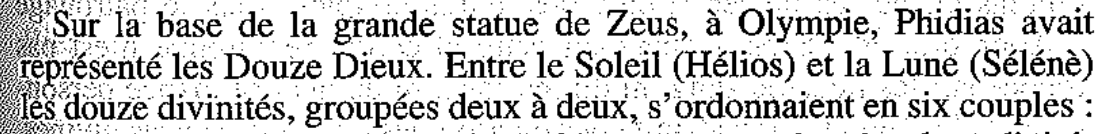


    Image #0:
    Origin: file:/content/text_with_noise.png
    Resolution: 95 dpi
    Width: 1095 px
    Height: 134 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


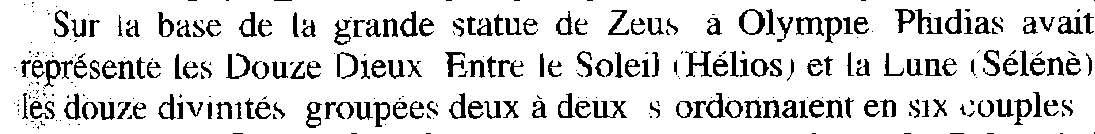

Detected text:

“Sur la base de la grande statue de Zeus a Olympie Phidias avait
représente les Douze Dieux Entre le Solei) (Hélios) et la Lune (Séléné)
‘les douze divinités groupées deux a deux s ordonnaient en six couples


In [11]:
adaptive_binarization = ImageAdaptiveBinarizer()
adaptive_binarization.setInputCol("image")
adaptive_binarization.setOutputCol("corrected_image")
adaptive_binarization.setWidth(20)
adaptive_binarization.setScale(3.5)
adaptive_binarization.setMethod(ThresholdingMethod.SAUVOLA)

pipeline = PipelineModel(stages=[
    binary_to_image,
    adaptive_binarization,
    ocr
])

for r in pipeline.transform(image_example_df).select("image", "corrected_image", "text").collect():
    display_image(r.image)
    display_image(r.corrected_image)
    print(f"Detected text:\n{r.text}")

## Gaussian local thresholding (Scala implementation)


    Image #0:
    Origin: file:/content/text_with_noise.png
    Resolution: 95 dpi
    Width: 1095 px
    Height: 134 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


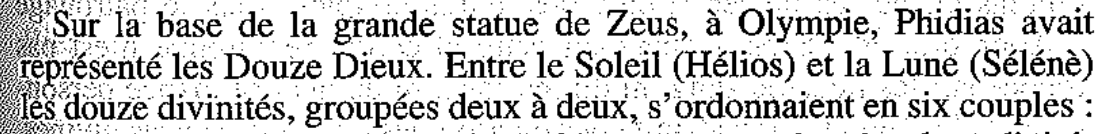


    Image #0:
    Origin: file:/content/text_with_noise.png
    Resolution: 95 dpi
    Width: 1095 px
    Height: 134 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


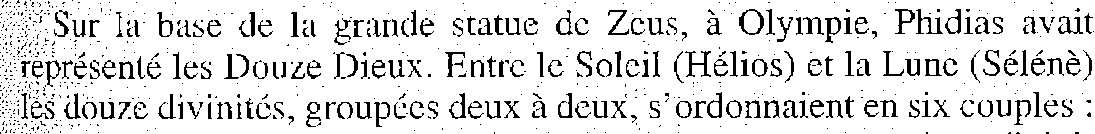

Detected text:

Sur la base de la grande statue de Zeus, 4 Olympic, Phidias avait
résenlé les Douze Dieux. Entre le Soleil (Hélios) et la Lune (Séléné)
ouze diviniiés, groupées deux 4 deux, s’ordonnaient en six couples :
   


In [12]:
adaptive_binarization = ImageAdaptiveBinarizer()
adaptive_binarization.setInputCol("image")
adaptive_binarization.setOutputCol("corrected_image")
adaptive_binarization.setWidth(20)
adaptive_binarization.setScale(4)
adaptive_binarization.setMethod(ThresholdingMethod.GAUSSIAN)

pipeline = PipelineModel(stages=[
    binary_to_image,
    adaptive_binarization,
    ocr
])

for r in pipeline.transform(image_example_df).select("image", "corrected_image", "text").collect():
    display_image(r.image)
    display_image(r.corrected_image)
    print(f"Detected text:\n{r.text}")

## Otsu thresholding


    Image #0:
    Origin: file:/content/text_with_noise.png
    Resolution: 95 dpi
    Width: 1095 px
    Height: 134 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


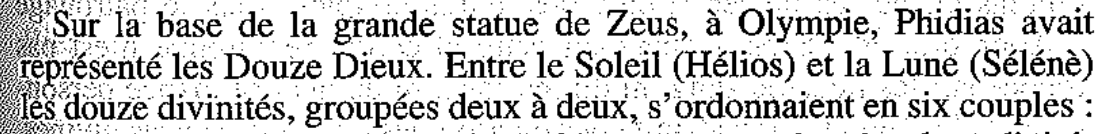


    Image #0:
    Origin: file:/content/text_with_noise.png
    Resolution: 95 dpi
    Width: 1095 px
    Height: 134 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


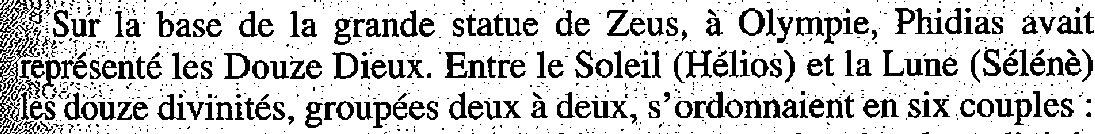

Detected text:

la base de la grande statue de Zeus, a “Olympie, Phidias avait
é les Douze Dieux. Entre le Soleil (Hélios) et la Lune (Séléné)
ze divinités, groupées deux a deux, Ss *ordonnaient en six couples’:
  
  


In [13]:
adaptive_binarization = ImageAdaptiveBinarizer()
adaptive_binarization.setInputCol("image")
adaptive_binarization.setOutputCol("corrected_image")
adaptive_binarization.setMethod(ThresholdingMethod.OTSU)


pipeline = PipelineModel(stages=[
    binary_to_image,
    adaptive_binarization,
    ocr
])

for r in pipeline.transform(image_example_df).select("image", "corrected_image", "text").collect():
    display_image(r.image)
    display_image(r.corrected_image)
    print(f"Detected text:\n{r.text}")